This is an attempt to replicate these results of the following paper:

    Sugar, C. A., & James, G. M. (2003). Finding the number of clusters in a dataset: An information-theoretic 
    approach. Journal of the American Statistical Association, 98(463), 750–763. JOUR.

In particular, the results that are illustrated in Fig. 4:

![Figure 4](https://github.com/vdyashin/JumpMethod/blob/master/Pic_001.png?raw=true)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from jumpsmethod import JumpsMethod

## Row 1

First, let us start with the first row of pictures in Fig. 4. Though it was not stated by the authors explicitly, obviously, all four clusters were drawn from a normal cdf with different mean parameters but the same covariance matrix as follows:

In [3]:
# means
Mu1, Mu2, Mu3, Mu4 = [-4, -4], [-4, 4], [4, -4], [4, 4]

# covariance
r = 0

# covariance matrix (Gamma)
Sigma = [[1, r], 
         [r, 1]]
# inversed cov matrix
Sigma_inv = np.linalg.inv(Sigma)

# sample size
n = 1000

Then, all four clusters are created

In [4]:
c1 = np.random.multivariate_normal(mean = Mu1, cov = Sigma, size = n)
c2 = np.random.multivariate_normal(mean = Mu2, cov = Sigma, size = n)
c3 = np.random.multivariate_normal(mean = Mu3, cov = Sigma, size = n)
c4 = np.random.multivariate_normal(mean = Mu4, cov = Sigma, size = n)

and concatenated into one data set

In [5]:
C = np.row_stack([c1, c2, c3, c4])
print(C.shape)

(4000, 2)


It looks quite similar to what the authors presented

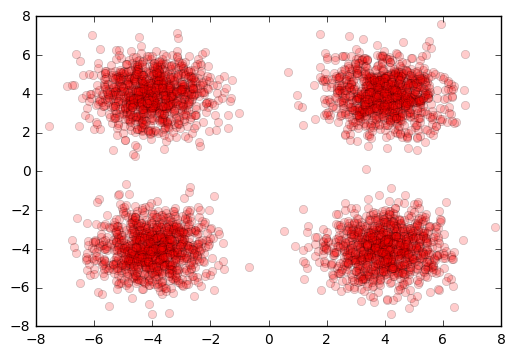

In [6]:
plt.plot(C[:, 0], C[:, 1], 'ro', alpha=0.2)
plt.show()

Now let us initialize the Jumps Method class with data from C

In [7]:
jm = JumpsMethod(data=C)

In [8]:
print('number of dimensions:', jm.p)

number of dimensions: 2


In order to calculate jumps, the distortions should be calculated first

In [9]:
jm.Distortions(cluster_range=range(1, 10 + 1), random_state=0)
print('distortions:', jm.distortions)

distortions: [  0.          16.94695473   8.94391346   4.95633125   0.99926406
   0.91351938   0.82823414   0.74705911   0.66454893   0.6086874
   0.55749184]


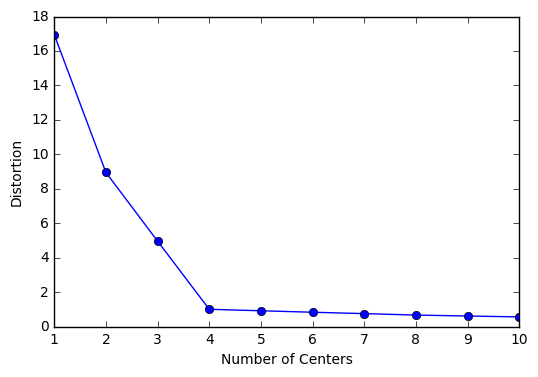

In [10]:
plt.plot(jm.distortions, '-bo')
plt.ylabel('Distortion')
plt.xlabel('Number of Centers')
plt.xlim(xmin=1)
plt.show()

In [11]:
jm.Jumps()
print('jumps:', jm.jumps)

jumps: [0, 0.059007651586900967, 0.052800228095427726, 0.089954260284460408, 0.79897434058668271, 0.093931042853333535, 0.11272052836232249, 0.13119411778317547, 0.16619791447284604, 0.13809932937545089, 0.15086881781235562]


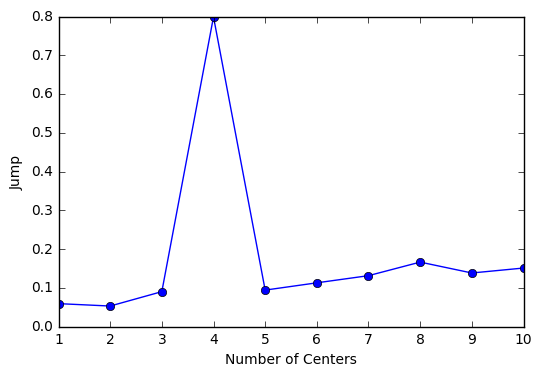

In [12]:
plt.plot(jm.jumps, '-bo')
plt.xlim(xmin=1)
plt.ylabel('Jump')
plt.xlabel('Number of Centers')
plt.show()

In [13]:
jm.recommended_cluster_number

4

## Row 2

Now, let us work with the second row of pictures in Fig. 4, but we will skip the comments since there is no need to repeat them because they are the same. 

It seems that only means were changed, so the parameters are as follows

In [14]:
# means
Mu1, Mu2, Mu3, Mu4 = [-2, -2], [-2, 2], [2, -2], [2, 2]

# covariance
r = 0

# covariance matrix (Gamma)
Sigma = [[1, r], 
         [r, 1]]
# inversed cov matrix
Sigma_inv = np.linalg.inv(Sigma)

# sample size
n = 1000

In [15]:
c1 = np.random.multivariate_normal(mean = Mu1, cov = Sigma, size = n)
c2 = np.random.multivariate_normal(mean = Mu2, cov = Sigma, size = n)
c3 = np.random.multivariate_normal(mean = Mu3, cov = Sigma, size = n)
c4 = np.random.multivariate_normal(mean = Mu4, cov = Sigma, size = n)

C = np.row_stack([c1, c2, c3, c4])

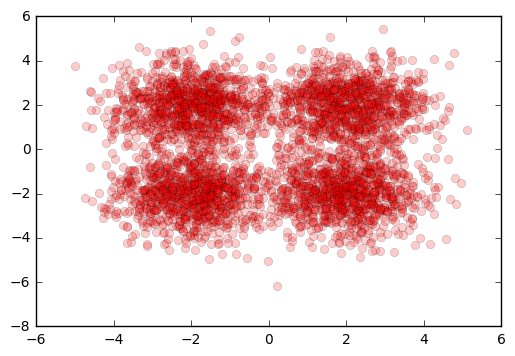

In [16]:
plt.plot(C[:, 0], C[:, 1], 'ro', alpha=0.2)
plt.show()

In [17]:
jm = JumpsMethod(data=C)
jm.Distortions(cluster_range=range(1, 10 + 1), random_state=0)

array([ 0.        ,  4.98206949,  2.93209076,  1.82558453,  0.92141706,
        0.82547706,  0.74155217,  0.66301334,  0.58952224,  0.53694952,
        0.48671937], dtype=float32)

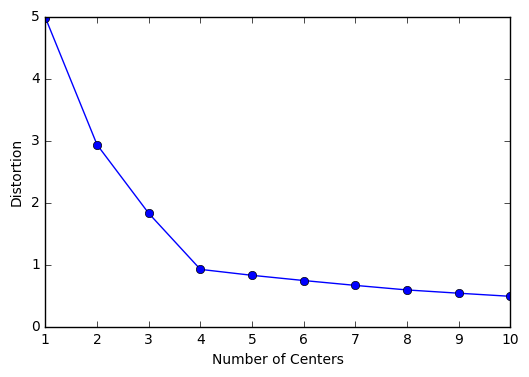

In [18]:
plt.plot(jm.distortions, '-bo')
plt.ylabel('Distortion')
plt.xlabel('Number of Centers')
plt.xlim(xmin=1)
plt.show()

In [19]:
jm.Jumps()

[0,
 0.20071980158797384,
 0.14033376124459843,
 0.20671619699615562,
 0.53751511941782226,
 0.12613581798181817,
 0.13710208368768773,
 0.15974249990607237,
 0.18802355754486899,
 0.16608364065785453,
 0.19219954310256826]

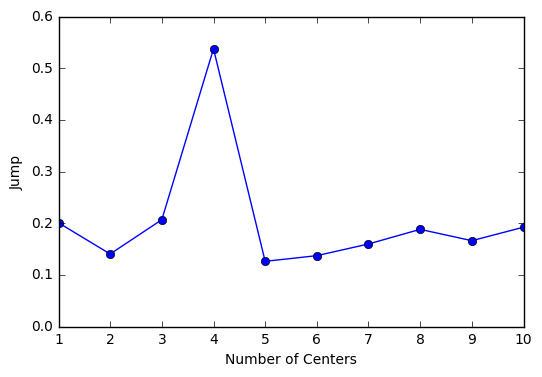

In [20]:
plt.plot(jm.jumps, '-bo')
plt.xlim(xmin=1)
plt.ylabel('Jump')
plt.xlabel('Number of Centers')
plt.show()

Both graphs look similar that the authors presented on Figure 4.

## Row 3

The last graph (c) is very vague. Hence one can hardly know what parameters are chosen for the distributions from which values are drawn.

[It has been tested for variance = 1. It was not successful, though.]

In [21]:
# means
Mu1, Mu2, Mu3, Mu4 = [-1, -1], [-1, 1], [1, -1], [1, 1]

# covariance
r = 0

# covariance matrix (Gamma)
Sigma = [[0.5, r], 
         [r, 0.5]]
# inversed cov matrix
Sigma_inv = np.linalg.inv(Sigma)

# sample size
n = 1000

In [22]:
c1 = np.random.multivariate_normal(mean = Mu1, cov = Sigma, size = n)
c2 = np.random.multivariate_normal(mean = Mu2, cov = Sigma, size = n)
c3 = np.random.multivariate_normal(mean = Mu3, cov = Sigma, size = n)
c4 = np.random.multivariate_normal(mean = Mu4, cov = Sigma, size = n)

C = np.row_stack([c1, c2, c3, c4])

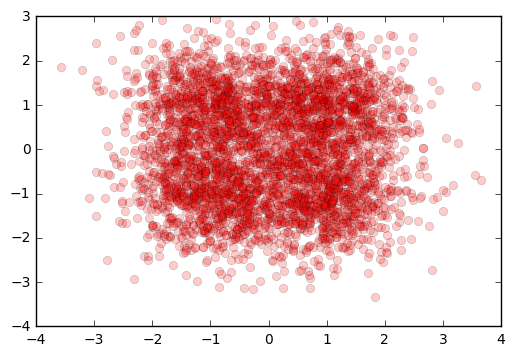

In [33]:
plt.plot(C[:, 0], C[:, 1], 'ro', alpha=0.2)
plt.show()

In [34]:
jm = JumpsMethod(data=C)
jm.Distortions(cluster_range=range(1, 10 + 1), random_state=0)

array([ 0.        ,  1.46656609,  0.92862636,  0.59135342,  0.39693975,
        0.34493688,  0.29571253,  0.25697845,  0.23114392,  0.2086727 ,
        0.19031921], dtype=float32)

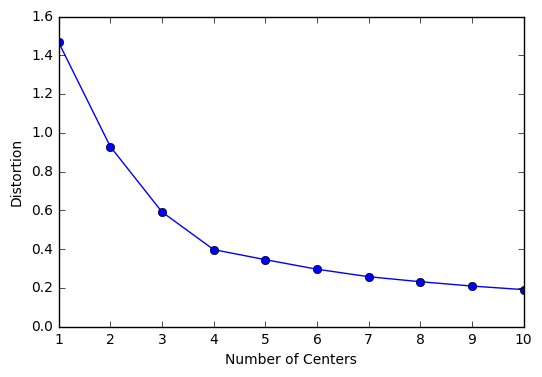

In [35]:
plt.plot(jm.distortions, '-bo')
plt.ylabel('Distortion')
plt.xlabel('Number of Centers')
plt.xlim(xmin=1)
plt.show()

In [36]:
jm.Jumps()

[0,
 0.6818649426520641,
 0.39499443231283438,
 0.61417676720408321,
 0.82823785016442719,
 0.37980715920751074,
 0.48258143112754226,
 0.50971426786882512,
 0.43493202671401399,
 0.46588477777975168,
 0.46213668015407627]

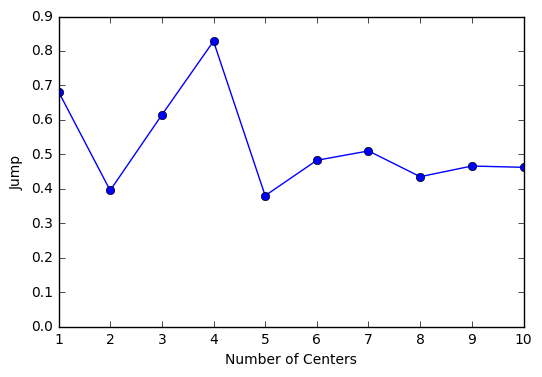

In [37]:
plt.plot(jm.jumps, '-bo')
plt.xlim(xmin=1)
plt.ylabel('Jump')
plt.xlabel('Number of Centers')
plt.show()

Even though the variance parameter of the pdfs was changed (look at Sigma matrix), the result can hardly be called similar to what authors was mentioned. 